# **Preparing Time Series from Wide-Form Data**
*   Samar KRIMI
*   18/12/2023

---

In [108]:
# Standard Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import tick customization tools
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
from matplotlib.ticker import FuncFormatter

In [109]:
import warnings
warnings.filterwarnings('ignore')

# **Part 1**



* I will be working with Zillow's publicly available Zillow House Value Index (ZHVI) https://www.zillow.com/research/data/

Zillow Home Value Index (ZHVI): A measure of the typical home value and market changes across a given region and housing type.

  - Specifically, I will be using the Home Value data set for:
      - Data Type = "ZHVI All Homes (SFR+Condo/Coop) - Time Series - Smoothed - Seasonally Adjusted"
      - Geography = "City"
* I will prepare the dataset for time series analysis.

 > **Prepare the dataset for time series analysis**

* Load in the Zillow Home Value Index dataframe

In [110]:
%%time
# Load weather data from London
url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB
CPU times: user 1.2 s, sys: 157 ms, total: 1.36 s
Wall time: 26.6 s


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
5,40326,5,Phoenix,city,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",Maricopa County,121786.0,122161.0,...,386475.0,391408.0,398975.0,406917.0,416954.0,424696.0,430372.0,428097.0,422019.0,413234.0
6,13271,6,Philadelphia,city,PA,PA,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,74705.0,74913.0,...,229457.0,229893.0,230282.0,230871.0,231866.0,233744.0,235810.0,237364.0,238641.0,239856.0
7,18959,7,Las Vegas,city,NV,NV,"Las Vegas-Henderson-Paradise, NV",Clark County,163456.0,163436.0,...,386716.0,396287.0,406330.0,417940.0,426638.0,434909.0,440268.0,441936.0,439130.0,433373.0
8,54296,8,San Diego,city,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",San Diego County,224292.0,225685.0,...,870773.0,892731.0,915085.0,940519.0,961875.0,976489.0,977085.0,966561.0,956608.0,950455.0
9,38128,9,Dallas,city,TX,TX,"Dallas-Fort Worth-Arlington, TX",Dallas County,119344.0,119508.0,...,291386.0,295947.0,302528.0,309201.0,317293.0,323657.0,329811.0,332004.0,332920.0,328711.0


In [111]:
# Check the df types
df.dtypes.value_counts()

float64    273
object       6
int64        2
dtype: int64

> **Filter the 4 largest cities into a new dataframe**

* the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value. Therefore the 4 largest cities would have rank values of [0,1,2,3]

In [112]:
# Check the different ranks
print(df['SizeRank'].unique())

[    0     1     2 ... 28413 28415 28439]


In [113]:
# Check the presence of missing values
print(df['SizeRank'].isnull().sum())

0


In [114]:
# Check the ascending unique values for 'SizeRank' feature
df['SizeRank'].value_counts(ascending=True, dropna=False).unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15, 436])

In [115]:
# Check the value counts for 'SizeRank' feature
df['SizeRank'].value_counts(ascending=True, dropna=False)


0          1
5755       1
5751       1
5748       1
5747       1
        ... 
23886     12
24588     13
24487     14
25606     15
28439    436
Name: SizeRank, Length: 11395, dtype: int64

In [116]:
# Filter the new dataFrame with the four largest cities # df.loc[df['SizeRank'].isin([0, 1, 2, 3])]
cities_df = df[df['SizeRank'].isin([0, 1, 2, 3])].copy()
cities_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


> **Melt the data to long-form and prepare it for time series analysis**

In [117]:
## First 8 columns are id columns
id_cols = cities_df.columns[:8]
id_cols

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'],
      dtype='object')

In [118]:
## Melt the wide-form weather data
long_df = pd.melt(cities_df, id_vars = id_cols, var_name='Date', value_name="Typical Home Value")
long_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Typical Home Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [119]:
# drop unnecessary features
drop_feats = ["RegionType", "StateName"]
long_df = long_df.drop(columns=drop_feats)
long_df

,RegionID,SizeRank,RegionName,State,Metro,CountyName,Date,Typical Home Value
0,6181,0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [120]:
# Check the melted df info
long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RegionID            1092 non-null   int64  
 1   SizeRank            1092 non-null   int64  
 2   RegionName          1092 non-null   object 
 3   State               1092 non-null   object 
 4   Metro               1092 non-null   object 
 5   CountyName          1092 non-null   object 
 6   Date                1092 non-null   object 
 7   Typical Home Value  1087 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 68.4+ KB


* Convert the melted dates into datetime datatype

In [121]:
# Convert the 'Date' column to datetime format
long_df['Date'] = pd.to_datetime(long_df['Date'])
long_df['Date']

0      2000-01-31
1      2000-01-31
2      2000-01-31
3      2000-01-31
4      2000-02-29
          ...    
1087   2022-08-31
1088   2022-09-30
1089   2022-09-30
1090   2022-09-30
1091   2022-09-30
Name: Date, Length: 1092, dtype: datetime64[ns]

* Make the datetime column the index

In [122]:
# Set 'Date' column as index
long_df = long_df.set_index('Date')
long_df

,RegionID,SizeRank,RegionName,State,Metro,CountyName,Typical Home Value
Date,,,,,,,
2000-01-31,6181,0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [123]:
# Check the datetime's index frequency
long_df.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-02-29', '2000-02-29', '2000-02-29', '2000-02-29',
               '2000-03-31', '2000-03-31',
               ...
               '2022-07-31', '2022-07-31', '2022-08-31', '2022-08-31',
               '2022-08-31', '2022-08-31', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

> **Resample the dataframe as monthly frequency, grouped by City**

In [124]:
# Check the cities number
long_df['RegionName'].nunique()

4

In [125]:
# Check the value counts for 'Regiontype' feature
long_df['RegionName'].value_counts(dropna=False)

New York       273
Los Angeles    273
Houston        273
Chicago        273
Name: RegionName, dtype: int64

In [126]:
## Resample the dataFrame to monthly frequency, grouped by city counting non-null values
# Get the average Typical Home Value for each city in each resampled period
# 'M' calendar month end
long_df_ts = long_df.groupby('RegionName').resample('M').mean()
long_df_ts

RegionID  SizeRank  Typical Home Value
RegionName Date                                              
Chicago    2000-01-31   17426.0       3.0            166139.0
           2000-02-29   17426.0       3.0            166536.0
           2000-03-31   17426.0       3.0            167368.0
           2000-04-30   17426.0       3.0            168826.0
           2000-05-31   17426.0       3.0            170499.0
...                         ...       ...                 ...
New York   2022-05-31    6181.0       0.0            768797.0
           2022-06-30    6181.0       0.0            773944.0
           2022-07-31    6181.0       0.0            777692.0
           2022-08-31    6181.0       0.0            779960.0
           2022-09-30    6181.0       0.0            781622.0

[1092 rows x 3 columns]

In [127]:
# Check the duplicates
long_df_ts.duplicated().sum()

3

In [128]:
# Check to see which data is duplicated
long_df_ts[long_df_ts.duplicated(keep = False)]

RegionID  SizeRank  Typical Home Value
RegionName Date                                              
Chicago    2006-06-30   17426.0       3.0                 NaN
           2008-03-31   17426.0       3.0                 NaN
           2008-04-30   17426.0       3.0                 NaN
Houston    2009-10-31   39051.0       2.0            130637.0
           2009-12-31   39051.0       2.0            130637.0

In [129]:
# Check missing values
long_df_ts.isna().sum()

RegionID              0
SizeRank              0
Typical Home Value    5
dtype: int64

In [130]:
# Count rows with missing values
na_rows = long_df_ts.isna().any(axis=1).sum()
print(f'{na_rows/len(long_df_ts)*100:.1f}% of rows are missing data')

0.5% of rows are missing data


In [131]:
# Interpolating Typical Home Value
long_df_ts['Typical Home Value'] = long_df_ts['Typical Home Value'].interpolate()

In [132]:
# Check missing values
long_df_ts.isna().sum().sum()

0

In [133]:
# Check the remain duplicates
long_df_ts.duplicated().sum()

1

In [134]:
# Check to see which data is duplicated after interpolating NaN
long_df_ts[long_df_ts.duplicated(keep = False)]

RegionID  SizeRank  Typical Home Value
RegionName Date                                              
Houston    2009-10-31   39051.0       2.0            130637.0
           2009-12-31   39051.0       2.0            130637.0

# **Part 2**

> **Plot the home values for all 4 cities**

In [135]:
# Select the relevant columns for the 4 largest cities
largest_cities = ['New York', 'Los Angeles', 'Houston', 'Chicago']
selected_ts = long_df_ts.loc[largest_cities, 'Typical Home Value']
selected_ts

RegionName  Date      
New York    2000-01-31    253690.0
            2000-02-29    255517.0
            2000-03-31    257207.0
            2000-04-30    260310.0
            2000-05-31    263204.0
                            ...   
Chicago     2022-05-31    312487.0
            2022-06-30    314663.0
            2022-07-31    315910.0
            2022-08-31    315587.0
            2022-09-30    315429.0
Name: Typical Home Value, Length: 1092, dtype: float64

In [136]:
# Use the unstack method to reshape the data
unstacked_ts = selected_ts.unstack(level=0)
unstacked_ts

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,166139.0,109068.0,234181.0,253690.0
2000-02-29,166536.0,109079.0,234401.0,255517.0
2000-03-31,167368.0,108878.0,235513.0,257207.0
2000-04-30,168826.0,108881.0,237589.0,260310.0
2000-05-31,170499.0,108834.0,240113.0,263204.0
...,...,...,...,...
2022-05-31,312487.0,265558.0,990391.0,768797.0
2022-06-30,314663.0,268901.0,992337.0,773944.0
2022-07-31,315910.0,271059.0,992630.0,777692.0


In [137]:
## creating our tick locators and formatters
## customize major ticks
# create the locator to place ticks every 2 years
major_loc= mdates.YearLocator(2)
major_fmt = mdates.DateFormatter("%Y")
## customize minor ticks
# create the locator to place ticks every 1 year
minor_loc = mdates.YearLocator(1)
minor_fmt = mdates.DateFormatter("%Y")

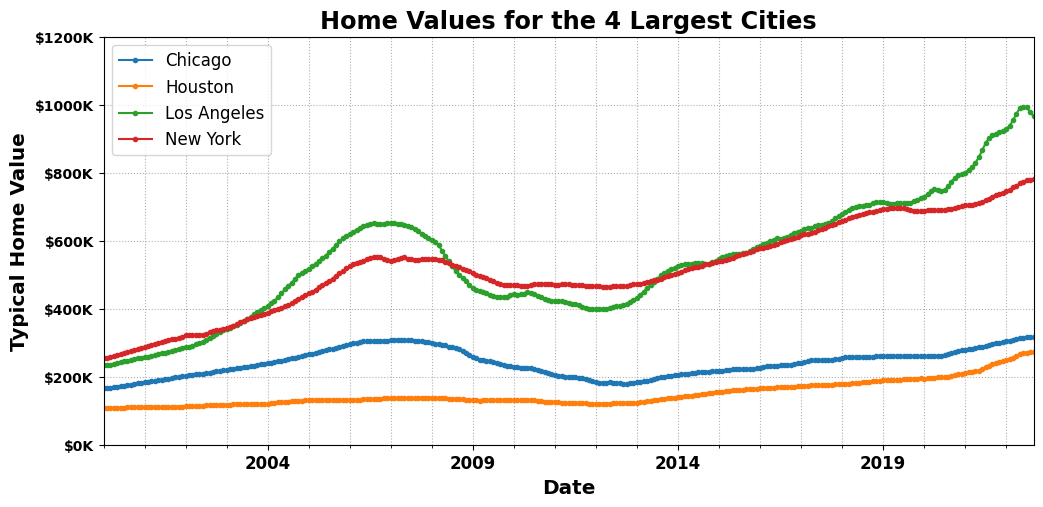

In [138]:
# Plot the home values for all 4 cities
fig, ax = plt.subplots(figsize=(12, 6))
unstacked_ts.plot(ax=ax, marker='.', lw=1.5)

ax.set_title('Home Values for the 4 Largest Cities', fontsize='xx-large', fontweight='semibold')
#ax.set_xlabel('Date', fontsize='x-large', fontweight='semibold')
ax.set_ylabel('Typical Home Value', fontsize='x-large', fontweight='semibold')

##  Set xticks and xticklables
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large', fontweight='semibold')

##  Set yticks and yticklables
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), fontsize='medium', fontweight='semibold')

## Increasing axis label font sizes
ax.set_xlabel(ax.xaxis.get_label().get_text(), fontsize='x-large', fontweight='semibold')
ax.set_ylabel(ax.yaxis.get_label().get_text(), fontsize='x-large', fontweight='semibold')

# Reformat y-axis ticks to use thousands of dollars with a "K" at the end
def format_thousands(value, pos):
    return f"${int(value / 1000)}K"

formatter = mticks.FuncFormatter(format_thousands)
ax.yaxis.set_major_formatter(formatter)

# Display the legend
plt.legend(fontsize='large')

## Making major/minor gridlines visually distinct
ax.grid(which='both', axis='both', ls=":")

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=0, ha='center')

# Show the plot
plt.show()

> **Answer the 2 questions using pandas**

### 1. Which City had the highest Typical Home Value at the end of 2008? Which had the least.

* Hint: I use the unstacked dataframe

In [139]:
# Check index for the unstacked dataframe
print(unstacked_ts.index)
# Display details about the MultiIndex names
print(unstacked_ts.index.names)

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=273, freq='M')
['Date']


In [140]:
# Filter the unstacked dataframe for the end of 2008
ts_filtred = unstacked_ts.loc['2008-12-31']
ts_filtred

RegionName
Chicago        265306.0
Houston        131283.0
Los Angeles    469294.0
New York       510309.0
Name: 2008-12-31 00:00:00, dtype: float64

In [141]:
# Find the city with the highest typical home values
max_city = ts_filtred.idxmax()
max_city

'New York'

In [142]:
print(f"City with the highest typical home value at the end of 2008: {max_city}")

City with the highest typical home value at the end of 2008: New York


In [143]:
# Find the city with the least typical home values
min_city = ts_filtred.idxmin()
min_city

'Houston'

In [144]:
print(f"City with the least typical home value at the end of 2008: {min_city}")

City with the least typical home value at the end of 2008: Houston


### 2.  How much did the home values change from November 2008 to December 2008 (in dollars)?

* Hint: I use .diff() to calculate the change in values

In [145]:
# Calculate the change in home values for each city
delta_unst_ts = unstacked_ts.diff()
delta_unst_ts

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,NaN,NaN,NaN,NaN
2000-02-29,397.0,11.0,220.0,1827.0
2000-03-31,832.0,-201.0,1112.0,1690.0
2000-04-30,1458.0,3.0,2076.0,3103.0
2000-05-31,1673.0,-47.0,2524.0,2894.0
...,...,...,...,...
2022-05-31,2838.0,4457.0,17223.0,6476.0
2022-06-30,2176.0,3343.0,1946.0,5147.0
2022-07-31,1247.0,2158.0,293.0,3748.0


- .diff() method returns the difference between the home values for each row and, by default, the previous row of the december 2008 is november 2008.

In [146]:
# Check change in home values for each city from November to December 2008
delta_unst_ts.loc['2008-12-31']

RegionName
Chicago        -5753.0
Houston         -964.0
Los Angeles   -12611.0
New York       -4458.0
Name: 2008-12-31 00:00:00, dtype: float64